In [36]:
!pip install japanize-matplotlib

  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [37]:
import japanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

In [38]:
plt.rcParams["font.family"] = "IPAexGothic"

In [15]:
df_result = pd.read_csv("human0821.csv")
df_gt = pd.read_csv("all_data.csv", index_col=0)

In [27]:
MAE = []

for index, row in df_result.iterrows():
    target_id = row["target_ID"]
    target_row = df_gt[df_gt.index==target_id]
    answers = []
    correct_answers = []
    for i in range(10):
        image_id = row[f"ID_of_image{i}"]
        answer = row[f"score_of_image{i}"]
        answers.append(answer)
        correct = target_row[f"No.{image_id+1}の画像があなたの好みであるかを0から10で評価してください．"]
        correct_answers.append(correct)
    mae = mean_absolute_error(correct_answers, answers)
    MAE.append(mae)
    print(row["clicked_count"], mae)

df_result["MAE"] = MAE

7 2.1
8 1.2
10 1.6
12 2.2
5 2.0
7 1.8
7 1.9
11 1.2
6 1.6
7 2.8
8 1.6
10 1.2
5 1.7
5 2.2
37 2.1
17 2.2
6 2.2
10 2.6
6 0.9
12 1.0
7 0.1
14 0.9
7 2.6
7 3.1
9 1.0
7 1.9
5 2.2
37 1.1
17 1.9
                   date_time              name  target_ID  clicked_count  \
0   2023-07-30T23:12:01.818Z         matsuzaki        461              7   
1   2023-07-31T00:31:15.218Z              しもやま         52              8   
2   2023-07-31T00:37:23.238Z              しもやま        350             10   
3   2023-07-31T00:42:53.835Z              しもやま        600             12   
4   2023-07-31T01:30:24.983Z         matsuzaki        643              5   
5   2023-07-31T01:33:26.944Z         matsuzaki        197              7   
6   2023-07-31T01:35:53.160Z         matsuzaki        350              7   
7   2023-07-31T01:39:37.727Z         matsuzaki        598             11   
8   2023-07-31T01:41:41.199Z         matsuzaki          7              6   
9   2023-07-31T01:43:37.207Z         matsuzaki        2

In [67]:
print("{:.1f}".format(df_result["clicked_count"].mean()), "{:.1f}".format(df_result["clicked_count"].std()))
print("{:.2f}".format(df_result["MAE"].mean()), "{:.2f}".format(df_result["MAE"].std()))

10.6 8.0
1.76 0.67


In [30]:
df_result.head()

,date_time,name,target_ID,clicked_count,clicked_images,ID_of_image0,score_of_image0,ID_of_image1,score_of_image1,ID_of_image2,...,score_of_image5,ID_of_image6,score_of_image6,ID_of_image7,score_of_image7,ID_of_image8,score_of_image8,ID_of_image9,score_of_image9,MAE
0,2023-07-30T23:12:01.818Z,matsuzaki,461,7,"87,4,10,1,70,9,49",32,4,23,4,64,...,4,75,3,81,3,95,2,6,3,2.1
1,2023-07-31T00:31:15.218Z,しもやま,52,8,"13,22,32,63,99,24,58,64",90,3,7,4,11,...,3,92,3,66,2,60,1,16,2,1.2
2,2023-07-31T00:37:23.238Z,しもやま,350,10,"64,2,19,63,77,98,0,5,57,47",87,5,83,3,90,...,3,51,2,92,3,54,0,69,8,1.6
3,2023-07-31T00:42:53.835Z,しもやま,600,12,"23,8,10,11,18,15,4,59,55,63,89,76",29,5,73,4,67,...,4,30,4,24,8,9,4,71,4,2.2
4,2023-07-31T01:30:24.983Z,matsuzaki,643,5,"70,58,24,76,94",55,0,56,2,32,...,3,18,3,97,6,84,7,49,8,2.0


Text(0, 0.5, 'MAE')

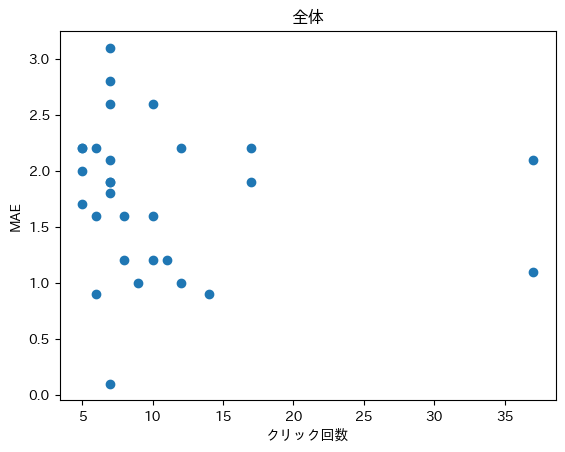

In [69]:
plt.scatter(df_result["clicked_count"], df_result["MAE"])
plt.title("全体")
plt.xlabel("クリック回数")
plt.ylabel("MAE")

In [31]:
people = df_result.iloc[:, 1].unique()

# 特定の列で重複する最初の行だけを抽出
duplicates = df_result[df_result.duplicated('name')]

# 重複を除いた元のデータを保持するために、duplicatesを元に新しいDataFrameを作成
df_unique = df_result.drop_duplicates('name')
print(df_unique)
df_unique.to_csv("first_result.csv")

                   date_time              name  target_ID  clicked_count  \
0   2023-07-30T23:12:01.818Z         matsuzaki        461              7   
1   2023-07-31T00:31:15.218Z              しもやま         52              8   
14  2023-07-31T03:00:33.701Z               liu          0             37   
16  2023-07-31T04:16:54.267Z           maekawa        543              6   
17  2023-08-02T07:03:21.539Z            minami        100             10   
18  2023-08-03T01:46:57.557Z           Kenshin         87              6   
21  2023-08-03T04:07:01.194Z       Kawra Ayano         31             14   
24  2023-08-03T14:41:36.425Z    Ryuki Matsuoka        612              9   
25  2023-08-04T04:41:28.880Z  Takuho Matsumuro          2              7   
26  2023-08-04T04:47:06.672Z         tachikawa          3              5   
27  2023-08-21T03:48:49.738Z             小野寺佳成         77             37   

                                       clicked_images  ID_of_image0  \
0               

Text(0, 0.5, 'MAE')

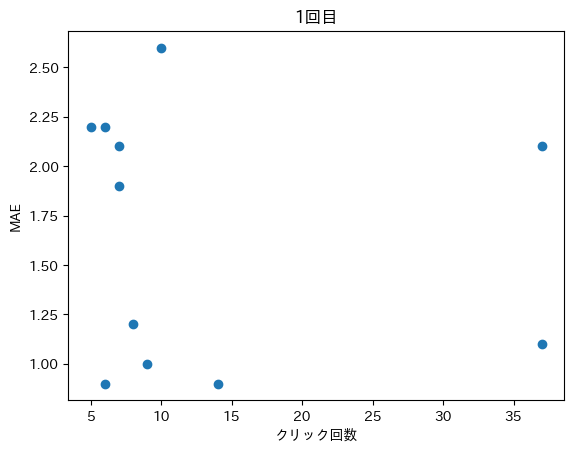

In [40]:
plt.scatter(df_unique["clicked_count"], df_unique["MAE"])
plt.title("1回目")
plt.xlabel("クリック回数")
plt.ylabel("MAE")

In [68]:
print("{:.1f}".format(df_unique["clicked_count"].mean()), "{:.1f}".format(df_unique["clicked_count"].std()))
print("{:.2f}".format(df_unique["MAE"].mean()), "{:.2f}".format(df_unique["MAE"].std()))

13.3 12.0
1.65 0.63


In [41]:
df_duplicates = df_result[df_result.duplicated('name', keep=False)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

range(1, 12)
0      7
4      5
5      7
6      7
7     11
8      6
9      7
10     8
11    10
12     5
13     5
Name: clicked_count, dtype: int64
range(1, 5)
1      8
2     10
3     12
22     7
Name: clicked_count, dtype: int64
range(1, 3)
14    37
15    17
Name: clicked_count, dtype: int64
range(1, 3)
16    6
23    7
Name: clicked_count, dtype: int64
range(1, 4)
18     6
19    12
20     7
Name: clicked_count, dtype: int64
range(1, 3)
27    37
28    17
Name: clicked_count, dtype: int64


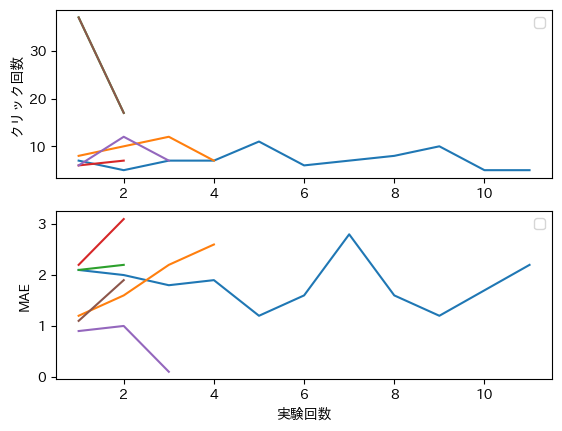

In [61]:
people_duplicate = df_duplicates.iloc[:, 1].unique()

fig, (ax1, ax2) = plt.subplots(2, 1)
for p in people_duplicate:
    rows = df_duplicates[df_duplicates["name"] == p]
    x = range(1, rows.shape[0] + 1)
    print(x)
    print(rows["clicked_count"], )
    ax1.plot(x, rows["clicked_count"])
    ax1.set_ylabel('クリック回数')
    ax1.legend()
    ax2.plot(x, rows["MAE"])
    ax2.set_xlabel('実験回数')
    ax2.set_ylabel('MAE')
    ax2.legend()

In [48]:
df_duplicates.head()

,date_time,name,target_ID,clicked_count,clicked_images,ID_of_image0,score_of_image0,ID_of_image1,score_of_image1,ID_of_image2,...,score_of_image5,ID_of_image6,score_of_image6,ID_of_image7,score_of_image7,ID_of_image8,score_of_image8,ID_of_image9,score_of_image9,MAE
0,2023-07-30T23:12:01.818Z,matsuzaki,461,7,"87,4,10,1,70,9,49",32,4,23,4,64,...,4,75,3,81,3,95,2,6,3,2.1
1,2023-07-31T00:31:15.218Z,しもやま,52,8,"13,22,32,63,99,24,58,64",90,3,7,4,11,...,3,92,3,66,2,60,1,16,2,1.2
2,2023-07-31T00:37:23.238Z,しもやま,350,10,"64,2,19,63,77,98,0,5,57,47",87,5,83,3,90,...,3,51,2,92,3,54,0,69,8,1.6
3,2023-07-31T00:42:53.835Z,しもやま,600,12,"23,8,10,11,18,15,4,59,55,63,89,76",29,5,73,4,67,...,4,30,4,24,8,9,4,71,4,2.2
4,2023-07-31T01:30:24.983Z,matsuzaki,643,5,"70,58,24,76,94",55,0,56,2,32,...,3,18,3,97,6,84,7,49,8,2.0


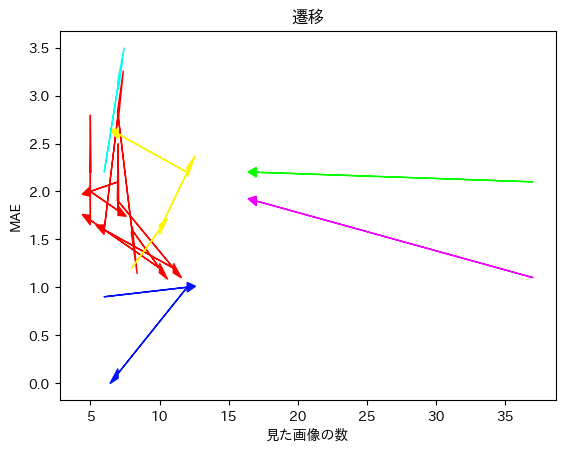

In [86]:
color_map = plt.get_cmap("hsv")

for index, p in enumerate(people_duplicate):
    rows = df_duplicates[df_duplicates["name"] == p]
    x = rows["clicked_count"].tolist()
    y = rows["MAE"].tolist()
    color = color_map(i/len(people_duplicate))
    for i in range(len(x) - 1):
        plt.arrow(x[i], y[i], x[i + 1] - x[i], y[i + 1] - y[i], head_width=0.1, head_length=0.6, fc=color_map(index/len(people_duplicate)), ec=color_map(index/len(people_duplicate)))

# グラフのタイトルとラベルを設定
plt.title('遷移')
plt.xlabel('見た画像の数')
plt.ylabel('MAE')

# グラフを表示
plt.show()